In [5]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
import numpy as np
np.random.seed(7)


print('Pyhton version:',sys.version)
print('TensorFlow version:',tf.__version__)
print('Keras version:',keras.__version__)



Using TensorFlow backend.


Pyhton version: 3.6.10 |Anaconda, Inc.| (default, May  7 2020, 19:46:08) [MSC v.1916 64 bit (AMD64)]
TensorFlow version: 2.2.0
Keras version: 2.3.1


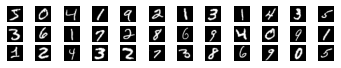

0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
3	
18	
18	
18	
126	
136	
175	
26	
166	
255	
247	
127	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
30	
36	
94	
154	
170	
253	
253	
253	
253	
253	
225	
172	
253	
242	
195	
64	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
49	
238	
253	
253	
253	
253	
253	
253	
253	
253	
251	
93	
82	
82	
56	
39	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
18	
219	
253	
253	
253	
253	
253	
198	
182	
247	
241	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
80	
156	
107	
253	
253	
205	
11	
0	
43	
154	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
0	
14	
1	
154	
253	
90	
0	
0

In [25]:
import tensorflow as tf
import numpy as np

mnist=keras.datasets.mnist

(X_train0,y_train0),(X_test0,y_test0)=mnist.load_data()

import matplotlib.pylab as plt

plt.figure(figsize=(6,1))
for i in range (36):
    plt.subplot(3,12,i+1)
    plt.imshow(X_train0[i],cmap="gray")
    plt.axis("off")
    
plt.show()

(X_train,Y_class_train),(X_test,Y_class_test)=mnist.load_data()
(X_train,Y_class_train),(X_test,Y_class_test)=keras.datasets.mnist.load_data()

for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t'%i)
        sys.stdout.write('\n')
        
X_train=X_train.reshape(X_train.shape[0],784)
X_train=X_train.astype('float64')/255
X_test=X_test.astype('float64')/255
                    

In [54]:
import tensorflow as tf
import numpy as np

img_rows=28
img_cols=28

(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()


input_shape=(img_rows,img_cols,1)
X_train=X_train.reshape(X_train.shape[0],img_rows,img_cols,1)
X_test=X_test.reshape(X_test.shape[0],img_rows,img_cols,1)

X_train=X_train.astype('float64')/255
X_test=X_test.astype('float64')/255

print('X_train shape:',X_train.shape)
print(X_train.shape[0],'train samples')
print(X_test.shape[0],'test samples')

batch_size=128
num_classes=10
epochs=12

y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [55]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(5,5),strides=(1,1),padding='same',
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(64,(2,2),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)             

In [57]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
hist=model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 133s 2ms/step - loss: 0.1853 - accuracy: 0.9427 - val_loss: 0.0537 - val_accuracy: 0.9819
Epoch 2/12
60000/60000 [==============================] - 128s 2ms/step - loss: 0.0570 - accuracy: 0.9818 - val_loss: 0.0295 - val_accuracy: 0.9904
Epoch 3/12
60000/60000 [==============================] - 138s 2ms/step - loss: 0.0458 - accuracy: 0.9855 - val_loss: 0.0280 - val_accuracy: 0.9905
Epoch 4/12
60000/60000 [==============================] - 127s 2ms/step - loss: 0.0361 - accuracy: 0.9881 - val_loss: 0.0262 - val_accuracy: 0.9911
Epoch 5/12
60000/60000 [==============================] - 125s 2ms/step - loss: 0.0296 - accuracy: 0.9908 - val_loss: 0.0228 - val_accuracy: 0.9922
Epoch 6/12
60000/60000 [==============================] - 135s 2ms/step - loss: 0.0266 - accuracy: 0.9915 - val_loss: 0.0242 - val_accuracy: 0.9921
Epoch 7/12
60000/60000 [==============================] - 130s

Test loss: 0.02305590580469434
Test accuracy 0.9939000010490417


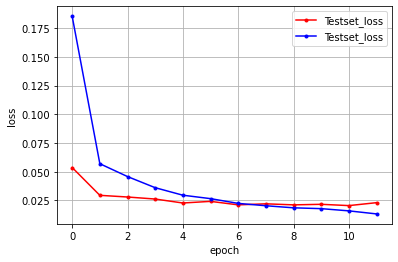

In [58]:
score=model.evaluate(X_test,y_test,verbose=0)
print("Test loss:",score[0])
print("Test accuracy",score[1])


import numpy as np

y_vloss=hist.history['val_loss']
y_loss=hist.history['loss']
x_len=np.arange(len(y_loss))
plt.plot(x_len,y_vloss,marker='.',c="red",label='Testset_loss')
plt.plot(x_len,y_loss,marker='.',c="blue",label='Testset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

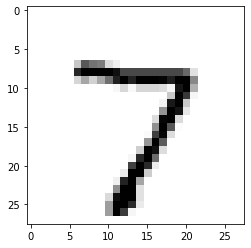

The Answer is [7]


In [63]:
n=0
plt.imshow(X_test[n].reshape(28,28),cmap='Greys',interpolation='nearest')
plt.show()
print('The Answer is',model.predict_classes(X_test[n].reshape((1,28,28,1))))